In [336]:
import numpy as np
import pandas as pd
from  MDAnalysis.coordinates.LAMMPS import DumpReader
import matplotlib
from cycler import cycler
import matplotlib.pyplot as plt 
import os
import LammpsFileManipulation as LFM
import MDAnalysis as mda
import matplotlib.pyplot as plt

In [337]:
def theorical_ans(X, l_param):
    Ans = []
    for x in X:
        
        if abs(x) <= 1.12*3:
            Ans.append(4 * (-12* 3**12/(x**13) + 6*3**6/(x**7)))
        elif abs(x)< 2.5*3:
            Ans.append(l_param * 4 * (-12* 3**12/(x**13) + 6*3**6/(x**7)))
        else:
            print(x)
            Ans.append(0)
    return np.array(Ans)

def theorical_ans_2(X, cut):
    Ans = []
    for x in X:
        if abs(x) < cut*3:
            Ans.append(4 * (-12* 3**12/(x**13) + 6*3**6/(x**7)))
        else:

            Ans.append(0)
    return np.array(Ans)


def new_theo(X, l):
    Ans = []
    for x in X:
        
        if abs(x) <= 1.12*3:
            Ans.append((-48/x**5* 3**12 + 24* 3**6 *x)/x**8)
        elif abs(x)< 2.5*3:
            Ans.append((-48/x**5* 3**12 *l+ 24* 3**6 *x*l)/x**8)
        else:
            print(x)
            Ans.append(0)
    return np.array(Ans)


In [338]:
dumpfile_name = "test_files/dump.test_2body"
energy_file = "test_files/1_0f_50n_0.0_energy.txt"

In [339]:
x_1 = []
x_2 = []
f_1 = []
f_2 = []
e = []


In [340]:
with open(dumpfile_name) as f1:
    with open(energy_file) as f2:
        line2 = f2.readline()
        line1 = f1.readline()
        while line1:
            if line1.startswith("1 1"):
                words = line1.split() 
                x_1.append(float(words[2]))
                f_1.append(float(words[8]))
                line1 = f1.readline()
                words = line1.split() 
                x_2.append(float(words[2]))
                f_2.append(float(words[8]))
                line2 = f2.readline()
                words = line2.split()
                e.append(float(words[2]))
                if abs(x_1[-1]-x_2[-1]) < 0.1:
                        break
            line1 = f1.readline()

In [341]:
# x_1.pop()
# f_1.pop()

In [342]:
np.abs(np.array(x_1) - np.array(x_2))

array([1.99    , 1.989985, 1.98998 , ..., 0.10002 , 0.100005, 0.1     ])

In [343]:
def force_theo(r):
    if r<1E-8:
        return 0
    if r<1:
        return 1/r
    elif r<2:
        return (r * np.e**(-r**2))
    else:
        return 0
    
vfunc = np.vectorize(force_theo)

In [344]:
vfunc(np.abs(np.array(x_1) - np.array(x_2)))

array([ 0.0379318 ,  0.03793378,  0.03793444, ...,  9.9980004 ,
        9.99950002, 10.        ])

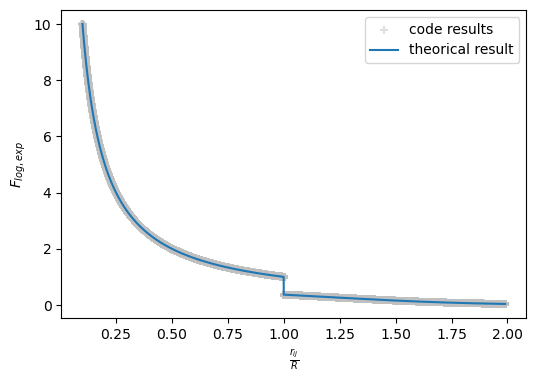

In [345]:
fig, ax = plt.subplots(1, 1, figsize = (6,4))
ax.scatter(np.abs(np.array(x_1) - np.array(x_2)), f_1, alpha = 0.5, label = 'code results', marker = '+', color = 'silver')
ax.plot(np.abs(np.array(x_1) - np.array(x_2)), vfunc(np.abs(np.array(x_1) - np.array(x_2))), label = 'theorical result')
ax.set( xlabel = r'$\frac{r_{ij}}{R}$', ylabel = r'$F_{log,exp}$')
ax.legend()
plt.savefig("test_2_body.pdf", dpi = 400)

In [346]:
def energy_theo(r):
    if r<1E-8:
        return 0
    if r<1:
        return -np.log(r) +  + 1/2.71828/2
    elif r<2:
        return ( np.e**(-r**2)/2)
    else:
        return 0
    
vfunc = np.vectorize(energy_theo)

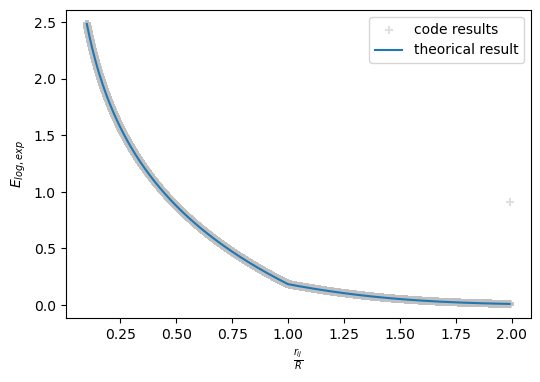

In [347]:
fig, ax = plt.subplots(1, 1, figsize = (6,4))
ax.scatter(np.abs(np.array(x_1) - np.array(x_2)), e, alpha = 0.5, label = 'code results', marker = '+', color = 'silver')
ax.plot(np.abs(np.array(x_1) - np.array(x_2)), vfunc(np.abs(np.array(x_1) - np.array(x_2))), label = 'theorical result')
ax.set( xlabel = r'$\frac{r_{ij}}{R}$', ylabel = r'$E_{log,exp}$')
ax.legend()
plt.savefig("test_2_body_energy.pdf", dpi = 400)

In [348]:
-1 + 1/np.e/2

-0.8160602794142788

In [349]:
-np.log(0.1) + 1/np.e/2

2.4865248135797664

In [350]:
np.e**(-1.1**2)/2

0.14909863971494366